# 1.    Setup the environment 

Importing the OS module for changing working Directory.

PANDAS,NUMPY for data manuplation.
Matplotlib,seaborn module for Data Visualisation. 

sklearn for modelling


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans

from sklearn.cluster import AgglomerativeClustering

import sklearn.metrics as metrics






# 2 .Importing  data

In [2]:
data =pd.read_csv('C:\\Users\\Keerthi\\Desktop\\Jigsaw\\10 UC-Advance Analytics & Machine Learning\\02-Assignment\\WEEK-4\\driver_data.csv')
print(data.head())
print('Data shape -->', data.shape)


   Distance_Feature  Speeding_Feature
0             71.24                28
1             52.53                25
2             64.54                27
3             55.69                22
4             54.58                25
Data shape --> (4000, 2)


# 3.Data preprocessing

### (i).Missing values

In [3]:
data.isnull().sum()

Distance_Feature    0
Speeding_Feature    0
dtype: int64

# 4  Data Preparation

The data we are using to build a clustering should

        1. Always be numeric and 
      2.should always be on same scale


### (i) Data Type

In [4]:
data.dtypes

Distance_Feature    float64
Speeding_Feature      int64
dtype: object

   
The features we are using for clustering are numeric

### (ii).Scaling the data

In [5]:
std_scale = StandardScaler().fit(data)
data_scaled = std_scale.transform(data)
data_scaled[:5,]



array([[-0.0898104 ,  1.26061251],
       [-0.43977285,  1.04174351],
       [-0.215131  ,  1.18765617],
       [-0.38066642,  0.8228745 ],
       [-0.40142849,  1.04174351]])

  Hence before we feed a data to a clustering algorithm it becomes imperative to bring our data on the same scale by using StandardScaler

# 4 (a) K-Means algorithm

Lets try to visulaize the data if we can segreggate into clusters

### (i).Scatter plot to visualise the scaled data and intial centriods for given K -clusters (K-Means)

In [6]:
def plot_kmeans_scale(k) :
  
    kmeans_model = KMeans(n_clusters=k, random_state=123)
    kmeans_model.fit(data_scaled)
    #Make predictions
    labels=kmeans_model.predict(data_scaled)
    #to get centroids
    centroid=kmeans_model.cluster_centers_
    colors=['r','g','p','b','o','y','m','w']
    fig2 =plt.figure()
    kx=fig2.add_subplot(111)
    for i in range(k) :
        points=np.array([data_scaled[j]for j in range(len(data_scaled))if labels[j]>=i])
        kx.scatter(points[:,0],points[:,1],s=7,cmap=colors[i])      
        kx.scatter(centroid[:,0],centroid[:,1],marker='*',s=200,c='red')
    plt.xlabel('Distance Feature')
    plt.ylabel('Speeding Feature')
    plt.title('Number of clusters = {}'.format(k))



        

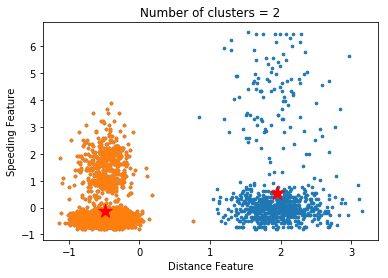

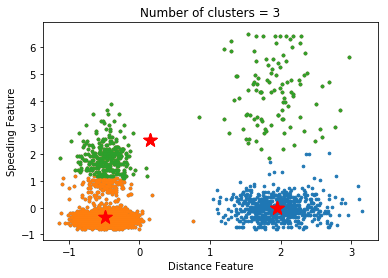

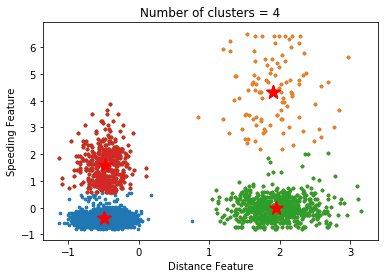

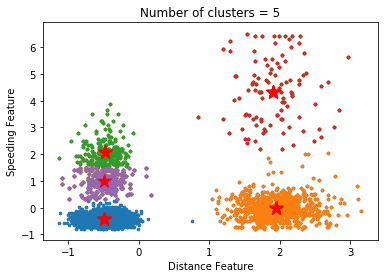

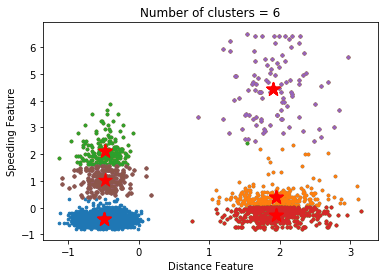

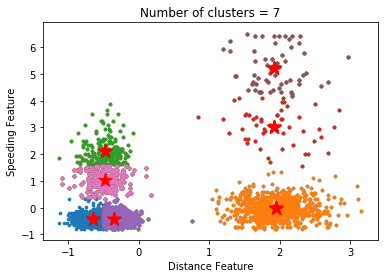

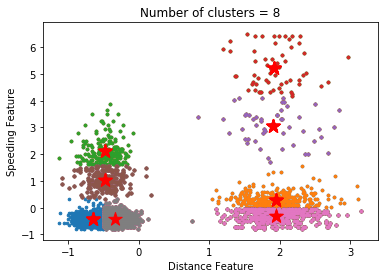

In [7]:
k=8
for i in range(k+1):
    if  i>1 :
        plot_kmeans_scale(i)

     Initial centroids are indicated as red stars.
     Starting with k =2 to 8 we ran the code, 
                Squared Euclidean distance measures the distance between each data point and the centroid, then the centroid will be re-calculated until the stop criteria and the following are screen shots of the results.
                A good choice of number of clusters will lead to compact and well separated clusters.
                That is to maximize intra-cluster similarity, and minimize inter-cluster similarity.
                

    Measure the compactness of clusters( inter-cluster similarity), We can compute a measure called "Within Sum of Squares for this cluster(WSS)"for each cluster or we can take an average. 

### (ii) Finding optimal number of clusters - Plot Scree pot/Elbow Plot

The technique we use to determine optimum K, the number of clusters, is called the elbow method.

Text(3.1, 5001, 'optimal number of clusters = 4')

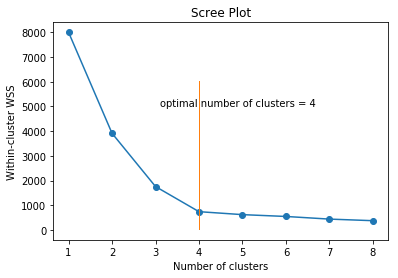

In [8]:
k=9
WSS = []
for k in range(1,9):
        kmeans_model = KMeans(n_clusters=k, random_state=123)
        kmeans_model.fit(data_scaled)
        WSS.append(kmeans_model.inertia_)
plt.plot(range(1,9), WSS, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster WSS")
plt.title("Scree Plot")
plt.plot([4]*6000, range(1,6001), ",")
plt.text(3.1, 5001, "optimal number of clusters = 4")
            
            

            

By plotting the number of centroids and the average distance between a data point and the centroid within the cluster we arrive at the above graph.

     inertia_ :The sum of squared distances within (WSS) the cluster to its centroid.
     
       Higher inertia_ refers to higher spread of data points from its own centroid. Lower inertia_ refers to higher concentration of datapoints at its own centroid. 
    From the Scree plot, inertia_ is decreasing with higher number of clusters. However, decrease in inertia_ got flattened from 4 clusters onwards. 
    To finalise the optimum number of clusters need to the similarity of data points in its own cluster compared to other clusters. This can be measured using Silhouette Score.

    The Silhouette score is maximum for 4 clusters. Also, it is evident from Scree curve ,inertia_ got flattened for 4 clusters onwards.
    
    Hence, based on Silhouette score and scree plot 4 clusters were considered as optimal clusters
    

In [9]:

for i in range(2,8):
    labels=KMeans(n_clusters=i,random_state=123).fit(data_scaled).labels_
    print ("Silhoutte score for k= "+str(i)+" is "+str(metrics.silhouette_score(data_scaled,labels,metric="euclidean",random_state=123)))


Silhoutte score for k= 2 is 0.7075955632562002
Silhoutte score for k= 3 is 0.7636008195603978
Silhoutte score for k= 4 is 0.7843727073779272
Silhoutte score for k= 5 is 0.7341393562942123
Silhoutte score for k= 6 is 0.6695347780615145
Silhoutte score for k= 7 is 0.42636724140389615


    The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters (separation). The value of this messure range from -1 to 1 and higher the value indicates maximum similarity in its own cluster.
    


### (iii). K-means clustering with 4 optimal Clusters

In [10]:
x1=data['Distance_Feature']
x2=data['Speeding_Feature']
X=np.array(list(zip(x1,x2)))

In [11]:
km = KMeans(n_clusters=4, random_state=123)
km.fit(data_scaled)
print('inertia with clusters=4 -->' ,km.inertia_)
km.cluster_centers_

inertia with clusters=4 --> 739.1534508645581


array([[-0.48678423, -0.40249736],
       [ 1.90400473,  4.34582367],
       [ 1.95263225, -0.0139714 ],
       [-0.47952334,  1.57909169]])

### (iv) Make predictions on the lables using K=4 

In [12]:
predicted_cluster = km.predict(data_scaled)
predicted_cluster[:40]


array([3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

## Functions to plot the K-means for given Cluster

In [13]:

##########  K-Means plot for scaled data  ###########
def plot_kmeans_scaled (k) :
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(data_scaled)
    predicted_cluster = km.predict(data_scaled)
    #plt.figure(figsize=(10, 5))

    plt.scatter(data_scaled[predicted_cluster==0,0], data_scaled[predicted_cluster==0, 1], s=10, c='green',\
                                  marker='s', edgecolors='green', label='cluster 1')
    plt.scatter(data_scaled[predicted_cluster==1,0], data_scaled[predicted_cluster==1, 1], s=10, c='orange',\
         marker='o', edgecolors='orange', label='cluster 2')
    plt.scatter(data_scaled[predicted_cluster==2,0], data_scaled[predicted_cluster==2, 1], s=10, c='blue',\
                              marker='v', edgecolors='blue', label='cluster 3')
    plt.scatter(data_scaled[predicted_cluster==3,0], data_scaled[predicted_cluster==3, 1], s=10, c='magenta',\
                              marker='v', edgecolors='magenta', label='cluster 4')
    plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250, c='red',\
                                  marker='*', edgecolors='black', label='centroids')
    plt.legend(scatterpoints=1)
    plt.xlabel("Distance_Feature")
    plt.ylabel("Speeding_Feature")
    plt.title("K-Means  Clustering Output")
    plt.show()



In [14]:


##########  K-Means  plot for  scaled data with boundary for clusters ###########
def plot_kmeans_scaled_boundary (k) :
    x1=data_scaled[:,0]
    x2=data_scaled[:,1]
    step_size = 0.01
    # define the boundaries
    x_min, x_max = min(x1) - 1, max(x1) + 1
    y_min, y_max = min(x2) - 1, max(x2) + 1
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

    km = KMeans(init='k-means++', n_clusters=k, n_init=10)
    km.fit(data_scaled)
    predicted_cluster = km.predict(data_scaled)
    # Predict labels for all points in the mesh
    predicted_labels = km.predict(np.c_[x_values.ravel(), y_values.ravel()])
    # Plot the results
    predicted_labels = predicted_labels.reshape(x_values.shape)
    plt.figure(figsize=(20, 15))
    plt.figure()
    plt.clf()
    plt.imshow(predicted_labels, interpolation='nearest',
               extent=(x_values.min(), x_values.max(), y_values.min(), y_values.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plot_kmeans_scaled(k)
    
    
   

In [15]:

##########  K-Means plot for original data ###########
def plot_kmeans_original(k) :
    x1=data['Distance_Feature']
    x2=data['Speeding_Feature']
    X=np.array(list(zip(x1,x2)))
    km_1 = KMeans(n_clusters=k, random_state=123)
    km_1.fit(X)
    predicted_cluster_1 = km_1.predict(X)
    
    plt.scatter(X[predicted_cluster_1==0,0], X[predicted_cluster_1==0, 1], s=10, c='green',\
                                 marker='s', edgecolors='green', label='cluster 1')

    plt.scatter(X[predicted_cluster_1==1,0], X[predicted_cluster_1==1, 1], s=10, c='blue',\
         marker='o', edgecolors='blue', label='cluster 2')
    plt.scatter(X[predicted_cluster_1==2,0], X[predicted_cluster_1==2, 1], s=10, c='orange',\
                              marker='v', edgecolors='orange', label='cluster 3')
    plt.scatter(X[predicted_cluster_1==3,0], X[predicted_cluster_1==3, 1], s=10, c='magenta',\
                              marker='v', edgecolors='magenta', label='cluster 4')
    plt.scatter(km_1.cluster_centers_[:,0], km_1.cluster_centers_[:,1], s=250, c='red',\
                                  marker='*', edgecolors='black', label='centroids')
    plt.legend(scatterpoints=1)
    plt.xlabel("Distance_Feature")
    plt.ylabel("Speeding_Feature")
    plt.title("K-Means Clustering Output -Original data")
    plt.show()

In [16]:

##########  K-Means plot for  original with boundary for clusters ###########
def plot_kmeans_original_boundary (k) :
    x1=data['Distance_Feature']
    x2=data['Speeding_Feature']
    X=np.array(list(zip(x1,x2)))
    # Step size of the mesh
    step_size = 0.01
    # define the boundaries
    x_min, x_max = min(x1) - 1, max(x1) + 1
    y_min, y_max = min(x2) - 1, max(x2) + 1
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

    km_1 = KMeans(init='k-means++', n_clusters=k, n_init=10)
    km_1.fit(X)
    predicted_cluster_1 = km_1.predict(X)
    predicted_labels = km_1.predict(np.c_[x_values.ravel(), y_values.ravel()])
    predicted_labels = predicted_labels.reshape(x_values.shape)
    plt.figure()
    plt.clf()
    plt.imshow(predicted_labels, interpolation='nearest',
               extent=(x_values.min(), x_values.max(), y_values.min(), y_values.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plot_kmeans_original(k)

### (v).  Plot the scaled data partitioned into optimal clusters K=4

<Figure size 1440x1080 with 0 Axes>

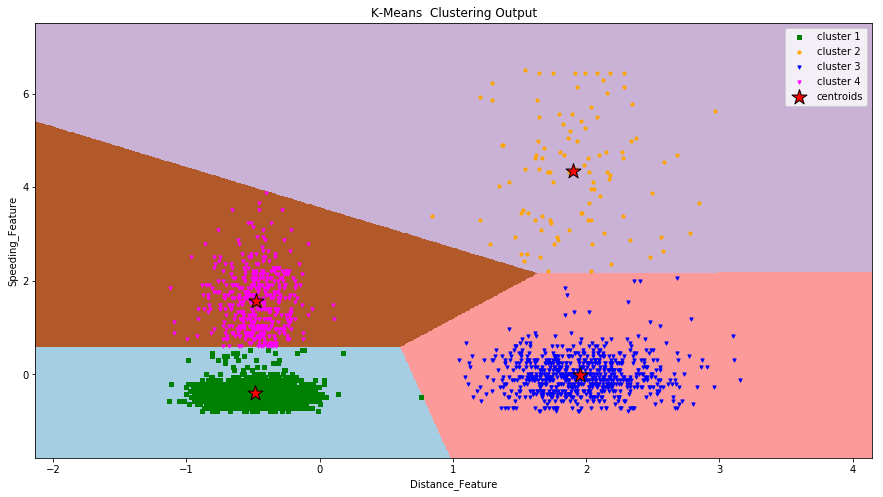

In [35]:
fig_size = plt.rcParams["figure.figsize"]  
fig_size[0] = 15  
fig_size[1] = 8 
plt.rcParams["figure.figsize"] = fig_size 
plot_kmeans_scaled_boundary(4)

### Observations


   As we have adoped standaradised scaling method 
 
                    scaled_value= (actual value - mean)/Standard deviation

In [18]:
print( 'value of cluster1 boundary of distance-->', (1*np.std(x1))+np.mean(x1))
print( 'value of cluster1 boundary of speed-->', (0.2*np.std(x2))+np.mean(x2))
print( 'value of cluster2 boundary of distance-->', (1*np.std(x1))+np.mean(x1))
print( 'value of cluster2 boundary of speed-->', (2.2*np.std(x2))+np.mean(x2))

value of cluster1 boundary of distance--> 129.50440096166722
value of cluster1 boundary of speed--> 13.46236578369249
value of cluster2 boundary of distance--> 129.50440096166722
value of cluster2 boundary of speed--> 40.876023620617396


   In conclusion, from Silhouette score and Scree plot, we can be clustered to four main groups of drivers :

          
  we can infer that the zero reference for speed_feature will be around its mean of 11 and for distance_feature will be 76
            So, approximately we can define the boundaries of our clusters as follows:          
        

Cluster 1 – when Distance_Feature is <130 and Speeding_Feature is <13  

Cluster 2 –  when Distance_Feature is >130 and Speeding_Feature is >40  

Cluster 3 – when Distance_Feature is >130 and Speeding_Feature is >40  

Cluster 4 – when  Distance_Feature is <130 and Speeding_Feature is > 13  

    we will compare this range of values with the original data (which is not scaled) 



### (vi) Comparing Scaled data with original data for defining boundaries of clusters-4 clusters(k-means)

<Figure size 1440x1080 with 0 Axes>

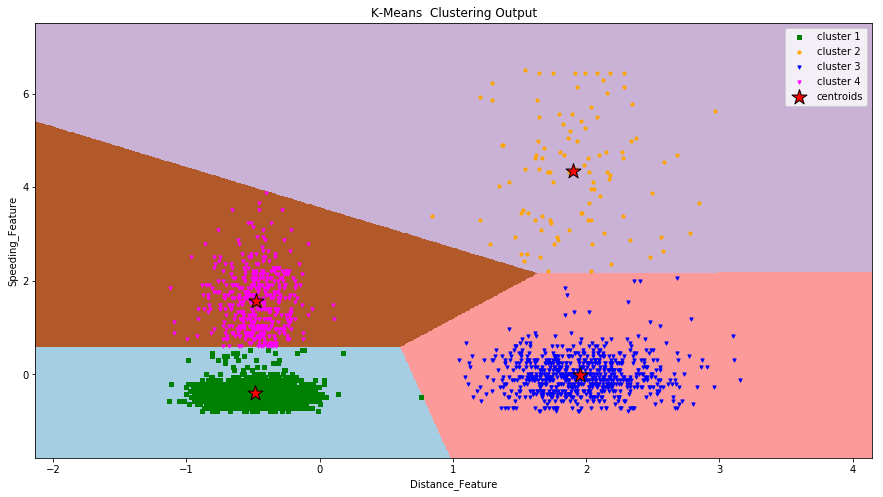

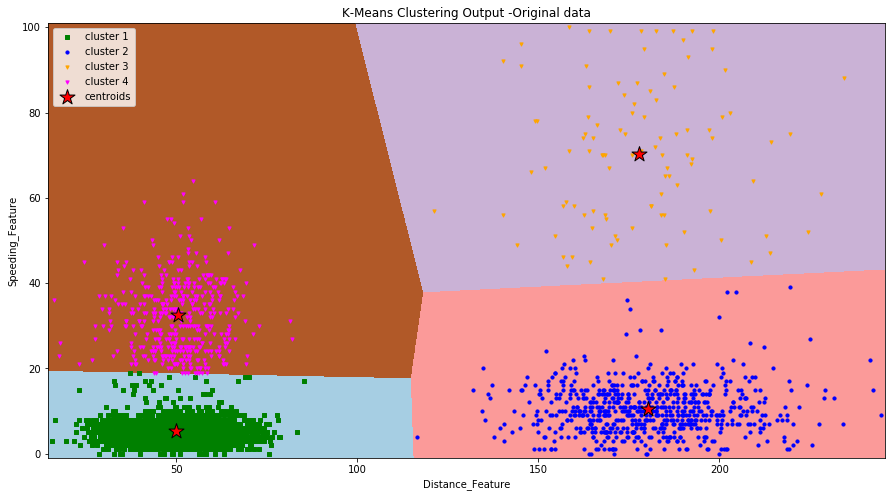

In [19]:
fig_size = plt.rcParams["figure.figsize"]  
fig_size[0] = 15  
fig_size[1] = 8 
plt.rcParams["figure.figsize"] = fig_size 
plot_kmeans_scaled_boundary(4)
x1=data['Distance_Feature']
x2=data['Speeding_Feature']
X=np.array(list(zip(x1,x2)))

km_1 = KMeans(n_clusters=4, random_state=123)
km_1.fit(X)
predicted_cluster_1 = km_1.predict(X)
fig_size = plt.rcParams["figure.figsize"]  
fig_size[0] = 15  
fig_size[1] = 8 
plt.rcParams["figure.figsize"] = fig_size 
plot_kmeans_original_boundary(4)

In conclusion, from Silhouette score and Scree plot, the "Driver_data.CSV" can be clustered to four main groups of drivers :

        We can redefine the cluster ranges as follows:


Cluster 1 – when Distance_Feature is <120 and Speeding_Feature is <20  

Cluster 2 –  when Distance_Feature is >120 and Speeding_Feature is >40  

Cluster 3 – when Distance_Feature is >120 and Speeding_Feature is >40  

Cluster 4 – when  Distance_Feature is <120 and Speeding_Feature is > 20  



It can be claimed that as inter-city and rural drivers, in Cluster 1 for example due to traffic jams and frequent stops the speed as well as the distance will be short, while in group Cluster 3 though the distance crossed is long speed is low and this can be justified in case of shipping trucks…etc.



### (vi) Create cluster profiles - Original Data

In [20]:

predictions_relabelled = np.where(predicted_cluster_1==0, "  Distance < 120 & Speed <20 ",\
                         np.where(predicted_cluster_1==1," Distance > 120 & Speed < 40",\
                         np.where(predicted_cluster_1==2, " Distance > 120 & Speed > 40 "," Distance < 120 & Speed > 20")))
data['category_Kmeans'] = pd.Series(predictions_relabelled, index=data.index)
data.index.name = "SNo"

pd.DataFrame(data).head(5)

,Distance_Feature,Speeding_Feature,category_Kmeans
SNo,,,
0,71.24,28,Distance < 120 & Speed > 20
1,52.53,25,Distance < 120 & Speed > 20
2,64.54,27,Distance < 120 & Speed > 20
3,55.69,22,Distance < 120 & Speed > 20
4,54.58,25,Distance < 120 & Speed > 20


# 4(B) Agglomerative clustering 

    	Agglomerative clustering as the name suggests takes a bottoms up approach
         We would want to minimize intra-cluster distance and maximize inter-cluster distance

    Features should be scaled and should be numeric. So we will consider the scaled data 'data_sacled' for clustering
      

### (i) Importing Libraries

In [21]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.cluster.hierarchy import set_link_color_palette
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as metrics


    A dendrogram is a visual representation of the observations and the hierarchy of clusters to which they belong.

    With dendrogram we can see the information about at what level of dissimilarity were these agglomerations done. 

    The height at which the branch is formed is directly related to how similar the observation are.
    

### (ii)Create dendrogram -  optimal number of clusters

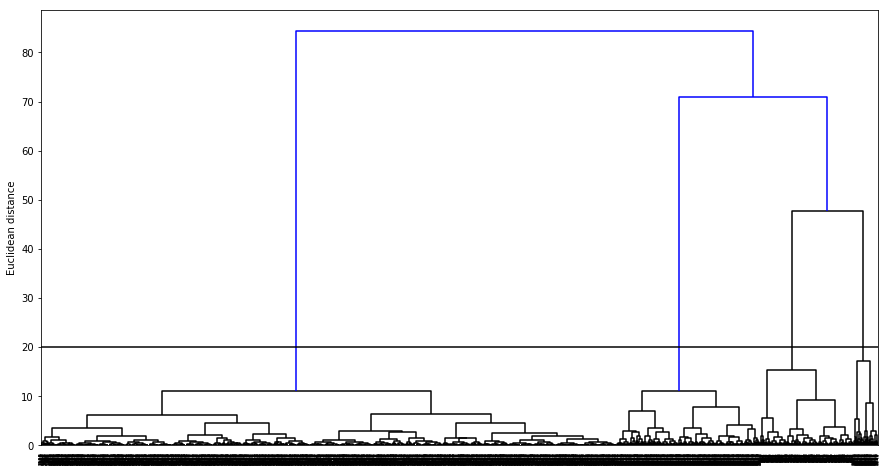

In [22]:
fig_size = plt.rcParams["figure.figsize"]  
fig_size[0] = 15  
fig_size[1] = 8 
plt.rcParams["figure.figsize"] = fig_size 
fig, ax = plt.subplots()
set_link_color_palette(['black'])
link = linkage(data_scaled, method='ward', metric='euclidean')
dnd = dendrogram(link)
plt.ylabel("Euclidean distance")
threshold = 20 #for hline
ax.axhline(y=threshold, c='k')
plt.show()


     The lower the height the lesser pairwise inter-cluster dissimilarities.
     
     Cutoff threshold by Euclidean distance :
     
     90    : No segmenation found . considered all data into one cluster
     80    : Found 2 clusters
     70-50 : found 3 clusters
     50-20 : found 4 clusters
     10    : Found 6 clusters
     
      Observed 50-20 covers the maximum distance with same number of clusters. 
      Lower the Euclidean's distance refers to high concentration of data points to centriod with in the cluster.
      The cutoff points of 20 & 10 to be finalised based on Shilloute score by measuring how similar an object is to its own cluster compared to other clusters (separation).


In [23]:

for i in range(2,7):
    agg_labels=AgglomerativeClustering(n_clusters=i).fit(data_scaled).labels_
    print ("Silhoutte score for clusters= "+str(i)+" is "+str(silhouette_score(data_scaled,agg_labels,metric="euclidean")))


Silhoutte score for clusters= 2 is 0.6422495198401666
Silhoutte score for clusters= 3 is 0.7573076255215898
Silhoutte score for clusters= 4 is 0.778897040913367
Silhoutte score for clusters= 5 is 0.7762594607264451
Silhoutte score for clusters= 6 is 0.7443058437156989


    Based on  
     80    : Found 2 clusters : 0.6422
     70-50 : found 3 clusters : 0.7573
     50-20 : found 4 clusters : 0.7788
     10    : Found 6 clusters : 0.7443
     shows that the 4 clusters have maximum intra cluster distance .
     Eculidean distance =20 with 4 clusters has minimum inter cluster distance and maximum intra cluster distance. 
     Hence 4 clusters were considered as optimal 
     

    The Silhouette score is maximum for 4 clusters.
        
    Hence, based on Silhouette score and Dendrogram 4 clusters were considered as optimal clusters

### (iii) Building agglomerative clustering with  optimal Clusters= 4

In [24]:

model = AgglomerativeClustering(n_clusters=4)
model.fit(data_scaled)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=4,
            pooling_func=<function mean at 0x0000021F30D5A730>)

###  (iv) Make predictions on the lables using K=4 

In [25]:
agg_labels =model.labels_
agg_labels[:40]


array([1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [26]:
def plot_agglomerative_scaled (k) :
    model = AgglomerativeClustering(n_clusters=k)
    model.fit(data_scaled)
    plt.figure(figsize=(10, 5))
    agg_labels =model.labels_
    plt.scatter(data_scaled[agg_labels==0,0], data_scaled[agg_labels==0, 1], s=10, c='green',\
                                  marker='s', edgecolors='green', label='cluster 1')
    plt.scatter(data_scaled[agg_labels==1,0], data_scaled[agg_labels==1, 1], s=10, c='brown',\
         marker='o', edgecolors='brown', label='cluster 2')
    plt.scatter(data_scaled[agg_labels==2,0], data_scaled[agg_labels==2, 1], s=10, c='blue',\
                              marker='v', edgecolors='blue', label='cluster 3')
    plt.scatter(data_scaled[agg_labels==3,0], data_scaled[agg_labels==3, 1], s=10, c='magenta',\
                              marker='v', edgecolors='magenta', label='cluster 4')

    plt.legend(scatterpoints=1)
    plt.xlabel("Distance_Feature")
    plt.ylabel("Speeding_Feature")
    plt.title("Agglomerative Clustering Output-Scaled data")
    plt.show()


In [27]:
def plot_agglomerative_original(k) :
    x1=data['Distance_Feature']
    x2=data['Speeding_Feature']
    X=np.array(list(zip(x1,x2)))
    model_1 = AgglomerativeClustering(n_clusters=k)
    model_1.fit(X)
    agg_labels_1 =model_1.labels_
    plt.scatter(X[agg_labels_1==0,0], X[agg_labels_1==0, 1], s=10, c='magenta',\
                                 marker='s', edgecolors='magenta', label='cluster 1')

    plt.scatter(X[agg_labels_1==1,0], X[agg_labels_1==1, 1], s=10, c='blue',\
         marker='o', edgecolors='blue', label='cluster 2')
    plt.scatter(X[agg_labels_1==2,0], X[agg_labels_1==2, 1], s=10, c='green',\
                              marker='v', edgecolors='green', label='cluster 3')
    plt.scatter(X[agg_labels_1==3,0], X[agg_labels_1==3, 1], s=10, c='brown',\
                              marker='v', edgecolors='brown', label='cluster 4')

    plt.legend(scatterpoints=1)
    plt.xlabel("Distance_Feature")
    plt.ylabel("Speeding_Feature")
    plt.title("Agglomerative Clustering Output -Original data")
    plt.show()


###  (v).  Plot the data partitioned into optimal clusters K=4

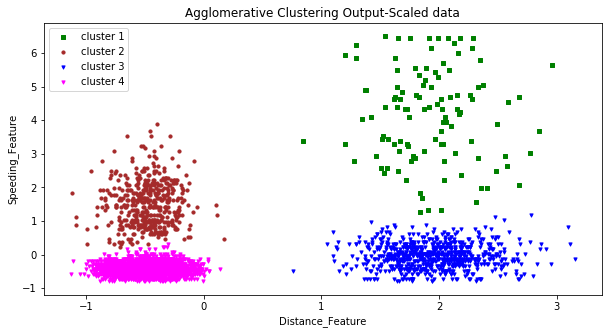

In [28]:
fig_size = plt.rcParams["figure.figsize"]  
fig_size[0] = 15  
fig_size[1] = 8 
plt.rcParams["figure.figsize"] = fig_size 
plot_agglomerative_scaled (4)

### Observations

   As we have adoped standaradised scaling method 
 
                    scaled_value= (variable-mean)/Standard deviation


In [29]:
print( 'value of cluster4 boundary of distance-->', (0.2*np.std(x1))+np.mean(x1))
print( 'value of cluster4 boundary of speed-->', (0.2*np.std(x2))+np.mean(x2))
print( 'value of cluster3 boundary of distance-->', (0.8*np.std(x1))+np.mean(x1))
print( 'value of cluster3 boundary of speed-->', (1.2*np.std(x2))+np.mean(x2))


value of cluster4 boundary of distance--> 86.73409819233349
value of cluster4 boundary of speed--> 13.46236578369249
value of cluster3 boundary of distance--> 118.81182526933378
value of cluster3 boundary of speed--> 27.16919470215494


   In conclusion, from Silhouette score and Scree plot, we can be clustered to four main groups of drivers :

       
  we can infer that the zero reference for speed_feature will be around its mean of 11 and for distance_feature will be 76
            So, approximately we can define the boundaries of our clusters as follows:          
        

Cluster 1 – when Distance_Feature is >120 and Speeding_Feature is >30  

Cluster 2 –  when Distance_Feature is <90 and Speeding_Feature is >13  

Cluster 3 – when Distance_Feature is >120 and Speeding_Feature is <30  

Cluster 4 – when  Distance_Feature is <90 and Speeding_Feature is < 13  

    we will compare this range of values with the original data (which is not scaled) 


### (vi) Comparing Scaled data with original data -4 clusters(Aggloremative Clustering)

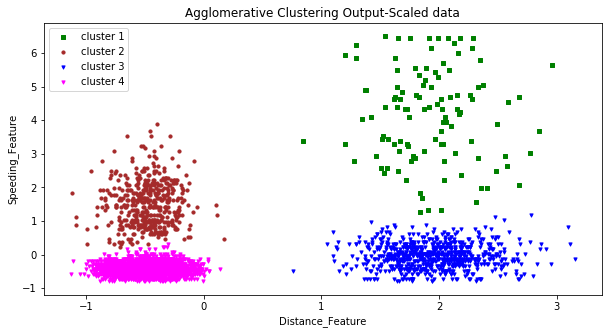

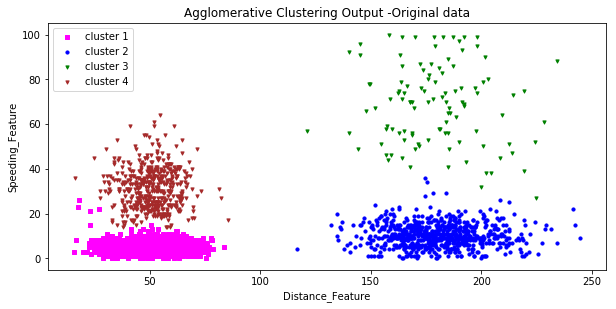

In [30]:

plot_agglomerative_scaled(4)

plt.figure(figsize=(10, 10))
plt.subplot(2, 1,2)
    
x1=data['Distance_Feature']
x2=data['Speeding_Feature']
X=np.array(list(zip(x1,x2)))
model_1 = AgglomerativeClustering(n_clusters=4)
model_1.fit(X)
agg_labels_1 =model_1.labels_

plot_agglomerative_original(4)



In conclusion, from Silhouette score and Scree plot, the "Driver_data.CSV" can be clustered to four main groups of drivers :

        We can redefine the cluster ranges as follows:

    Cluster 1 – when Distance_Feature is <120 and Speeding_Feature is <20  

    Cluster 2 –  when Distance_Feature is >120 and Speeding_Feature is <40  

    Cluster 3 – when Distance_Feature is > 120 and Speeding_Feature is >40  

    Cluster 4 – when  Distance_Feature is <120 and Speeding_Feature is >20  
    
    

### (vi) Create cluster profiles -Original Data 

In [31]:
predictions_relabelled_agg = np.where(agg_labels_1==0, " Distance < 120 & Speed <20 ",\
                         np.where(agg_labels_1==1," Distance > 120 & Speed < 40",\
                         np.where(agg_labels_1==2, " Distance >120 & Speed > 40 "," Distance < 120 & Speed > 20")))
data['category_aggloremative'] = pd.Series(predictions_relabelled_agg)

pd.DataFrame(data).head(10)



,Distance_Feature,Speeding_Feature,category_Kmeans,category_aggloremative
SNo,,,,
0,71.24,28,Distance < 120 & Speed > 20,Distance < 120 & Speed > 20
1,52.53,25,Distance < 120 & Speed > 20,Distance < 120 & Speed > 20
2,64.54,27,Distance < 120 & Speed > 20,Distance < 120 & Speed > 20
3,55.69,22,Distance < 120 & Speed > 20,Distance < 120 & Speed > 20
4,54.58,25,Distance < 120 & Speed > 20,Distance < 120 & Speed > 20
5,41.91,10,Distance < 120 & Speed <20,Distance < 120 & Speed <20
6,58.64,20,Distance < 120 & Speed > 20,Distance < 120 & Speed > 20
7,52.02,8,Distance < 120 & Speed <20,Distance < 120 & Speed <20
8,31.25,34,Distance < 120 & Speed > 20,Distance < 120 & Speed > 20


### Comparing the scatter plots of clustering of  K-Means model and Hierarchical clustering model

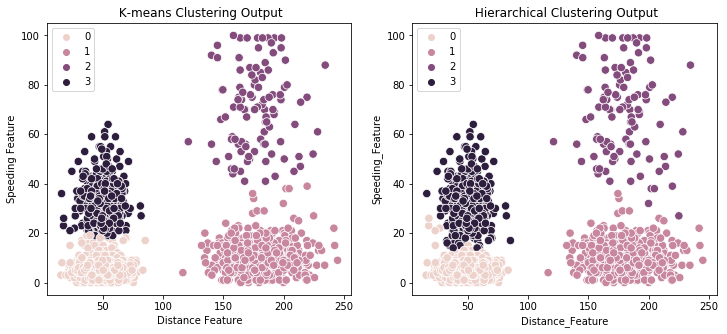

In [32]:
import seaborn as sns
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 2)
sns.scatterplot(x='Distance_Feature', y='Speeding_Feature', data=data, hue=agg_labels_1, s=70)
plt.title(" Hierarchical Clustering Output")
plt.subplot(1, 2, 1)
sns.scatterplot(x='Distance_Feature', y='Speeding_Feature', data=data, hue= predicted_cluster_1, s=70)
plt.xlabel("Distance Feature")
plt.ylabel("Speeding Feature")
plt.title(" K-means Clustering Output")
plt.show()

### Observations

It is evident from the above plot that K-means clustering is more successful in having minimum inter cluster similarity and maximum intra cluster similarity between the data points than Hierarchical clustering.

we can confrim the same using silhouette_score.

# (5)Compare the results of  K-Means model and  Hierarchical clustering model using silhouette scores. 

In [33]:
from sklearn.metrics import silhouette_score
agg_silhouette = silhouette_score(data_scaled, agg_labels)
kmeans_silhouette = silhouette_score(data_scaled, predicted_cluster)


In [34]:
print('Silhouette Score of K-Means clustering model with 4 Clusters -->',kmeans_silhouette)
print('Silhouette Score of Hierarchical clustering model with 4 Clusters -->',agg_silhouette)


Silhouette Score of K-Means clustering model with 4 Clusters --> 0.7843727073779272
Silhouette Score of Hierarchical clustering model with 4 Clusters --> 0.778897040913367


    The Silhouette score can take values in the interval [-1, 1]. 

    If it is 0 –> the sample is very close to the neighboring clusters.
    It it is 1 –> the sample is far away from the neighboring clusters.
    It it is -1 –> the sample is assigned to the wrong clusters.
    Therefore, we want the coefficients to be as big as possible and close to 1 to have a good clusters.
    So we can conclude that having 4 clusters , compared to Hierarchical clustering K-means is superior as it is having higher Silhouette score